In [21]:
#Stock Price Prediction Using Python & Machine Learning
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime

In [22]:
yf.pdr_override()

In [23]:
#Getting the stock quote
df = pdr.get_data_yahoo("AAPL", start="2012-1-1", end="2022-12-24")

[*********************100%***********************]  1 of 1 completed


In [24]:
#Show data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519281,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586561,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838934,394024400
...,...,...,...,...,...,...
2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000


In [25]:
#Getting the number of rows and columns in the data set
df.shape

(2764, 6)

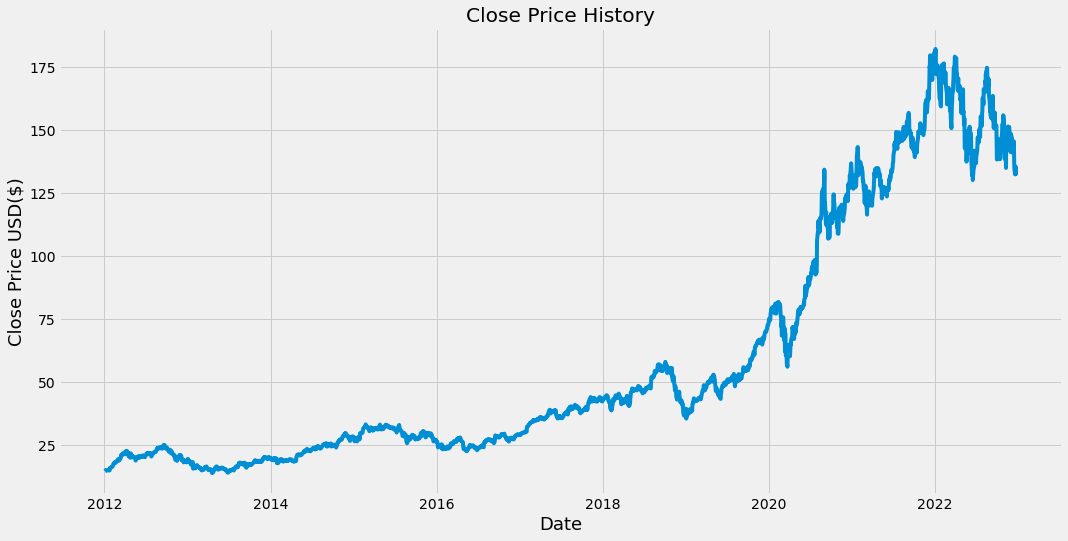

In [26]:
#Vizualize the data on the closing price
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.show()

In [28]:
#Create new dataframe with only the "Close" column
data = df.filter(["Close"])

In [29]:
#Convert the dataframe to a numpy array
dataset = data.values

In [30]:
#Get number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2212

In [31]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.72296021],
       [0.70380067],
       [0.70159913]])

In [32]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]

In [99]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [101]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798]), array([0.00486851, 0.00584391, 0.00677256, 0.00663019, 0.00695107,
       0.00680444, 0.00655793, 0.00622217, 0.00726133, 0.00819848,
       0.00790947, 0.0063263 , 0.00783722, 0.00634968, 0.01

In [115]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [116]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4304, 60, 1)

In [117]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [118]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [119]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4304/4304 [==============================] - 106s 24ms/step - loss: 4.2767e-04


In [120]:
#Create the testing data set
#Create a new array containing scaled values from index 2132 to 2192
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [121]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [122]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [123]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 16ms/step


In [124]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.8515130886133166

C:\Users\Joao\AppData\Local\Temp\ipykernel_7308\2881808160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

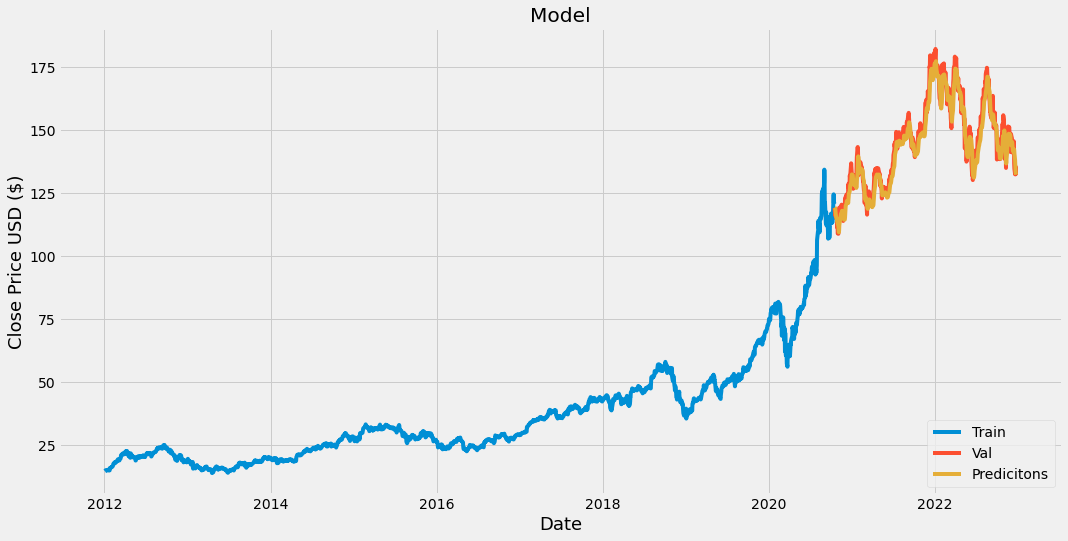

In [125]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Vizualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predicitons"], loc="lower right")
plt.show

In [126]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-16,119.019997,119.189163
2020-10-19,115.980003,118.905167
2020-10-20,117.510002,117.706680
2020-10-21,116.870003,116.860077
2020-10-22,115.750000,116.171570
...,...,...
2022-12-19,132.369995,137.994598
2022-12-20,132.300003,135.426987
2022-12-21,135.449997,133.423767


In [127]:
#Get the quote
apple_quote = pdr.get_data_yahoo("AAPL", start="2012-1-1", end="2022-12-24")
#Create a new dataframe
new_df = apple_quote.filter(["Close"])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 26ms/step
[[131.51364]]
